OVERVIEW:

Dating apps have become one of the leaders if not the leader in how one searches for romantic partnerships. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people search for romance.


DATASET:

profiles.csv, provided by Codecademy

SCOPE:

Utilizing a dataset of OKCupid users and the skills developed through Codecademy, the hope is to provide a deeper understanding and offer insight to the users of OKCupid.  The questions I hope to answer:

Can a users' astrological signs be predicted using other variables from their profiles?

Can a users' alcohol consumption or drug use be predicted based on their education levels?

Are there common conversation starters users hope to employ and can we predict those from other variables?

In [1]:
#General Use Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6,6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

LOADING THE DATA:

Using pandas, the user profiles from OKCupid will be loaded into Python as a DataFrame object to be explored and eventually visualized.

The dataset, profiles.csv, is loaded into a variable called profiles, and will be examined using various Python methods.

In [2]:
profiles = pd.read_csv('profiles.csv', encoding = 'utf-8')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
print(profiles.columns)
profiles.last_online.head()

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')


0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

DATA CHARACTERISTICS:

The columns of the dataset are:

    age: continuous variable of user's age
    body_type: categorical variable of user's body type
    diet: categorical variable of dietary information
    drinks: categorical variable of alcohol consumption
    drugs: categorical variable of drug usage
    education: categorical variable of highest education level attained
    ethnicity: categorical variable of ethnic backgrounds
    height: continuous variable of user's height
    income: continuous variable of user's income
    job: categorical variable of employment
    offspring: categorical variable describing user's desire for children
    orientation: categorical variable of user's sexual orientation
    pets: categorical variable of pet preferences
    religion: categorical variable of religious background
    sex: categorical variable of gender
    sign: categorical variable of astrological symbol
    smokes: categorical variable of smoking consumption
    speaks: categorical variable of languages spoken
    status: categorical variable of relationship status
    last_online: date variable of last login
    location: categorical variable of user locations

These columns are short-answer open responses

    essay0: Self Summary
    essay1: What am I doing with my life
    essay2: What am I really good at
    essay3: The first thing people notice about me
    essay4: Favorites; books, movies, shows, music, food, etc.
    essay5: What are six things you could never do without
    essay6: I spend a lot of time thinking about
    essay7: On a typical Friday night I am
    essay8: The most private thing I am willing to admit
    essay9: You should message me if...

EXPLORE THE DATA:

We first want to answer: Can a users' astrological signs be predicted using other variables from their profiles?

So, first let's expore the unique signs, and the categories assigned to them in case there are qualifier's like "but it doesn't matter" which was seen in the .head() call.

    With the print statements below we see there are 48 categories, more than the expected 12 zodiac signs.  This is due to the qualifiers added as noted above.

In [4]:
#Save the columns of the dataset as a list for future uses
profiles_lst = list(profiles.columns)
print('Number of categories:', profiles.sign.nunique())
print('Star sign categories:', profiles.sign.unique())

Number of categories: 48
Star sign categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries

CLEAN LABELS:

We should clean labels down to the expected 12 zodiac signs. Data for each sign split based qualifier's created by the user is intriguing and saved to a separate list.

In [5]:
zodiac_sign = []
qualifiers = []
for item in profiles['sign']:
    if isinstance(item, str): # Check if the item is a string
        parts = item.split(' ', 1) # Split at the first space
        zodiac_sign.append(parts[0]) # Add the zodiac sign to their list
        qualifiers.append(parts[1] if len(parts) > 1 else '') # Add the qualifiers to their list
    else:
        zodiac_sign.append(np.nan) # Preserve NaN values to later, hopefully, use a ML classifier for imputation
        qualifiers.append(np.nan)

profiles['zodiac_sign'] = zodiac_sign
profiles['sign_qualifiers'] = qualifiers

print('Number of Zoidac Signs', profiles.zodiac_sign.nunique())
print('Categories:', profiles.zodiac_sign.unique())

print('Number of qualifiers:', profiles.sign_qualifiers.nunique())
#print('Categories:', profiles.sign_qualifiers.unique())

print(profiles.zodiac_sign.value_counts())
zodiac_nan = profiles['zodiac_sign'].isna().sum()
print(zodiac_nan)

Number of Zoidac Signs 12
Categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']
Number of qualifiers: 4
leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: zodiac_sign, dtype: int64
11056


CONTINUOUS VARIABLES:

The continuous variables are; age, height, and income. Using seaborn to visualize the data and understand the dataset's users a little better.

    Interesting to note that sex is a binary choice, [m, f] with 0 NaN values

Text(0.5, 1.03, 'Age of Users (yr)')

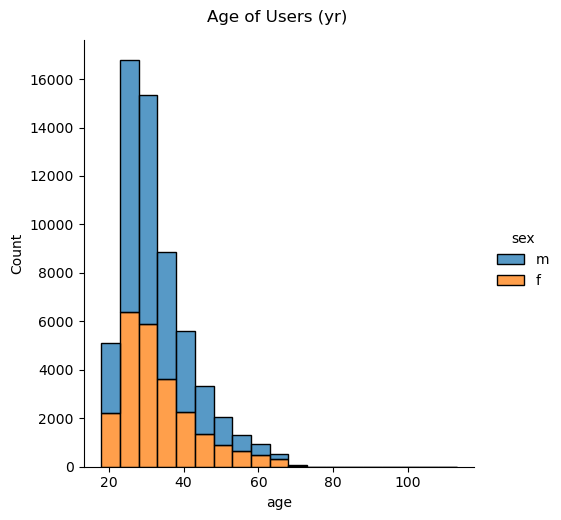

In [6]:
# Distribution of user profiles with gender splits shown as stacked bins.

# First is age distribution which appears to be left skewed, so more younger people
# which tracks for a dating app's user population
plot_age = sns.displot(data=profiles, x = 'age', hue = 'sex', kind = 'hist', binwidth = 5, multiple = 'stack')
plot_age.figure.suptitle('Age of Users (yr)', y=1.03)


Text(0.5, 1.03, 'Height of Users (in)')

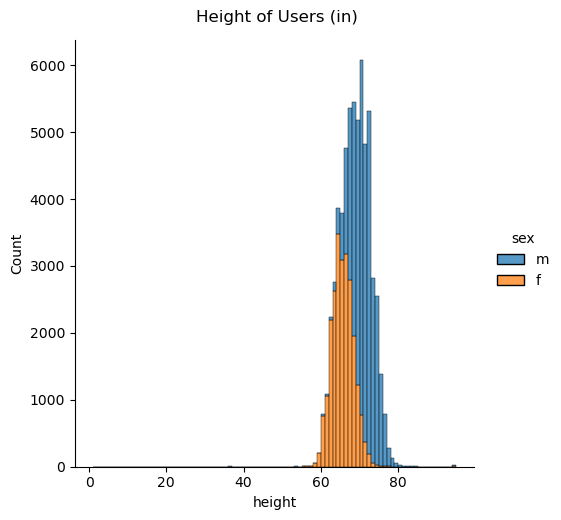

In [7]:
# Next up is height distribution
# Heights appear normally distributed though anecdotally men appear to be listing
# their heights as close to 6 feet as possible...
plot_height = sns.displot(data = profiles, x = 'height', hue = 'sex', kind = 'hist', binwidth = 1, multiple  = 'stack')
plot_height.figure.suptitle('Height of Users (in)', y=1.03)



Text(0.5, 1.03, 'Income of Users ($)')

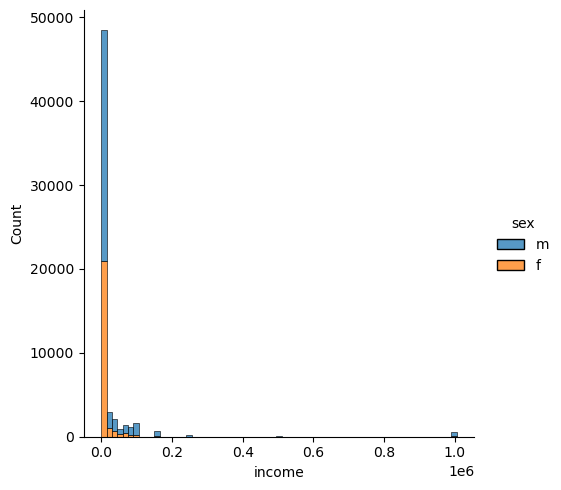

In [8]:
# Final distribution for continuous variables is Income distribution
# There appears to be an outlier here way off to the right, an income of 1,000,000
# Think about filtering income range if we want to use it in our predictions
plot_income = sns.displot(data=profiles, x = 'income', hue = 'sex', kind = 'hist', binwidth = 15000, multiple = 'stack')
plot_height.figure.suptitle('Income of Users ($)', y=1.03)

#print(profiles.sex.unique())
#sex_nan = profiles['sex'].isna().sum()
#print(sex_nan)


DISCRETE VARIABLES:

Our discrete variables are as follows:

    sex, body type, diet, drinks, drugs, education, jobs, offspring, orientation, pets, religion, signs, smoking, status.

Some will be more useful than others, but visualizing them and cleaning up their data when necessary will allow easier, and more efficient computations later.

<Axes: xlabel='count', ylabel='sex'>

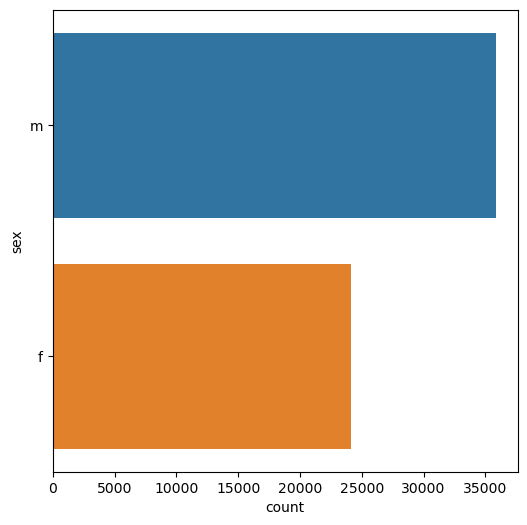

In [9]:
# We previously found that sex is a binary choice for this dataset with 0 NaN values
# meaning all of the collected user information filled out one or the other or was
# cherry-picked from cis-gendered users.

sns.countplot(data = profiles, y ='sex')

<Axes: xlabel='count', ylabel='orientation'>

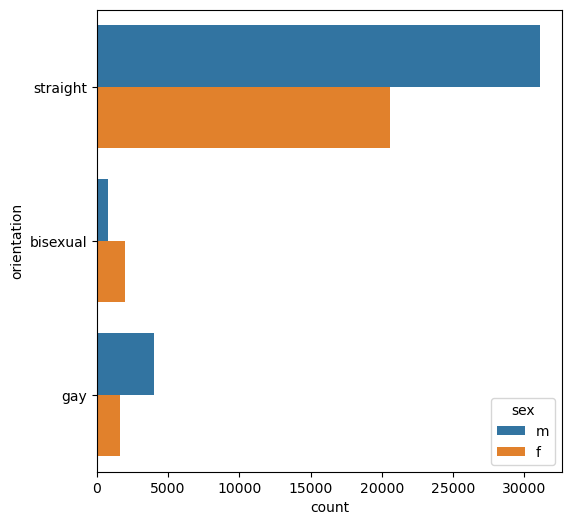

In [10]:
# Sexual orientation of users as simply defined as gender
# There is at least some users identifying as gay and bisexual but the majority
# of both men and women identify as straight.

sns.countplot(data = profiles, y = 'orientation', hue = 'sex')

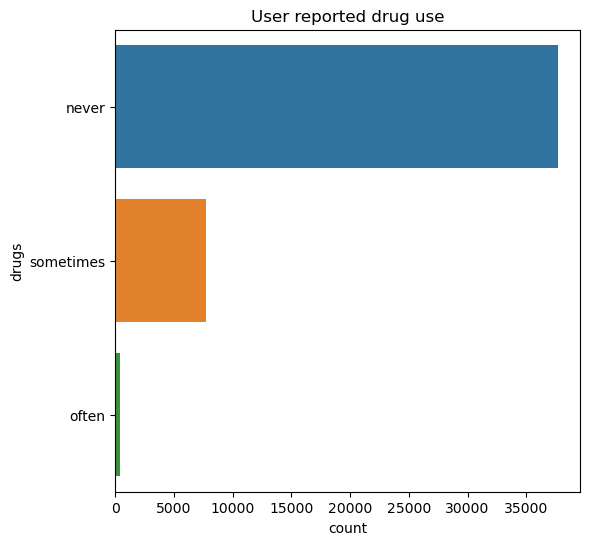

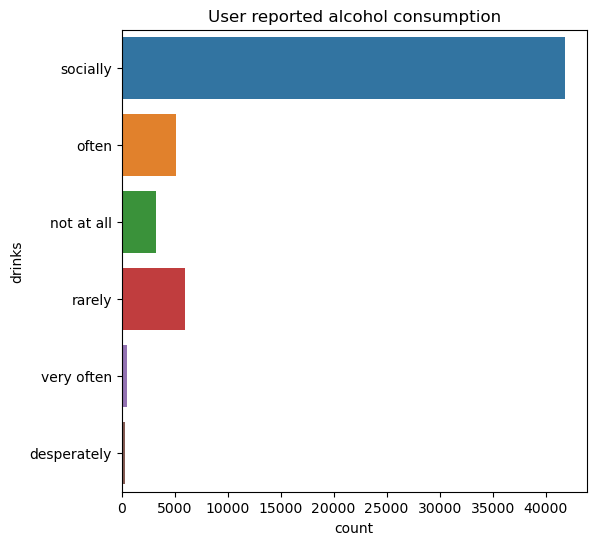

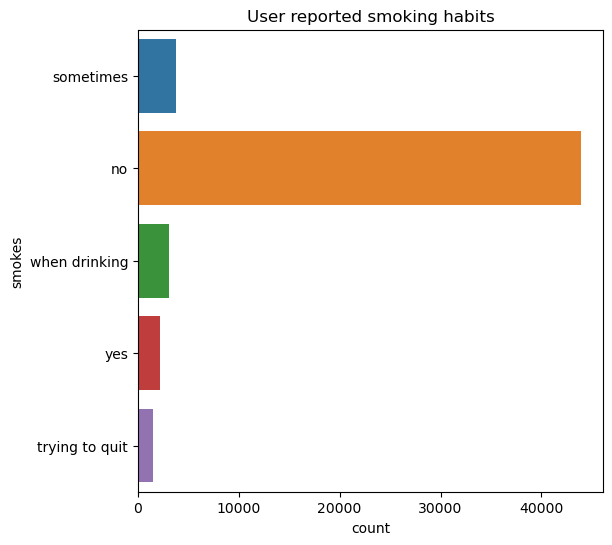

In [12]:
# Drug use, alcohol, and smoking are all grouped together since they are similar
# extra-curricular activities for lack of a better descriptor.

sns.countplot(data = profiles, y ='drugs')
plt.title('User reported drug use')
plt.show()
sns.countplot(data = profiles, y ='drinks')
plt.title('User reported alcohol consumption')
plt.show()
sns.countplot(data = profiles, y ='smokes')
plt.title('User reported smoking habits')
plt.show()

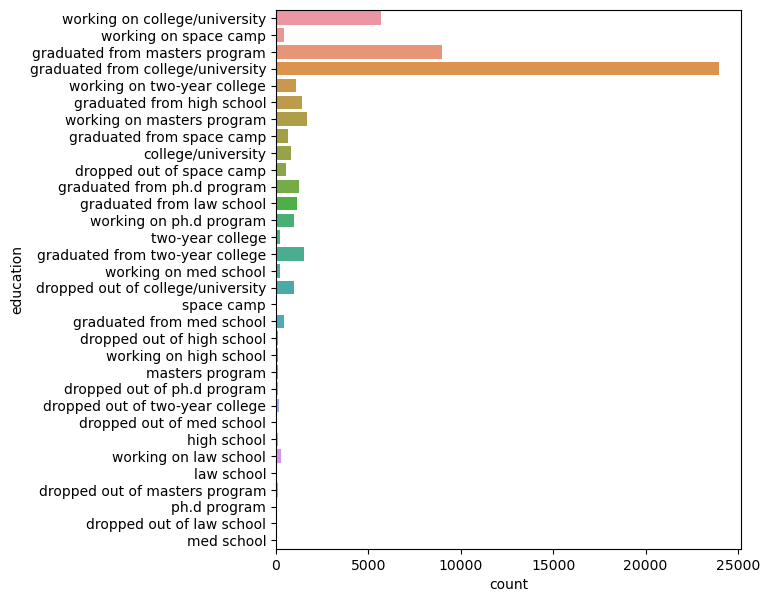

32


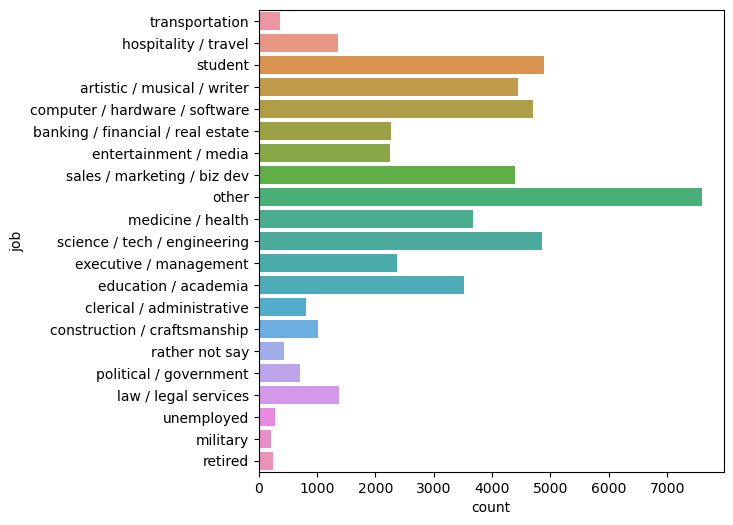

21


In [18]:
# Next is education.
# There are 32 unique options for education inputs including whimiscal options
# like space camp.  This feature doesn't seem to be full of serious responses
# perhaps reframing the second question in the scope to be employment based and
# not education based is a better avenue to explore.

plt.figure(figsize = (6,7))
sns.countplot(data = profiles, y ='education')
plt.show()

print(profiles.education.nunique())

sns.countplot(data=profiles, y="job")
plt.show()

print(profiles.job.nunique())

# There are 21 unique job obtions and if the same space camp graduates are finding
# their whimsy here it appears those choices are consolidated in an "other" category